# Dataviz with folium NDGRC

Some help about foloium here: https://python-visualization.github.io/folium/latest/

## Import a few modules

In [1]:
import sys
import numpy as np
import pandas as pd
import gpxpy
import matplotlib.pyplot as plt
import geopy.distance
import glob
import os
import time
from selenium import webdriver 
import subprocess
import importlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import folium
import geojson
import xyzservices.providers as xyz
from datetime import datetime

pd.options.mode.copy_on_write = True

sys.path.append("../my_modules")
import toolToReadGPX as ttrgpx

run_club_name = "NDGRC"

# Load Data

In [2]:
importlib.reload(ttrgpx)

# list of file names
path_csv_files = "../data/csv/"
list_csv_files  = glob.glob(path_csv_files+run_club_name+"*_downSample.csv")
list_csv_files.sort()

# list of panda DataFrame
list_run_df = [pd.read_csv(x) for x in list_csv_files]

# DataFrame with information about all gps traces
all_last_traces_info_df = ttrgpx.fun_create_df_from_list_df(list_run_df, list_csv_files, ttrgpx.startingPoint_df, club_name = run_club_name)

# do a last cleaning to remove errands before the start of the run
list_run_df, all_last_traces_info_df  = ttrgpx.fun_traces_before_race_from_lits_df(list_run_df,
                                                                                   all_last_traces_info_df,
                                                                                   ttrgpx.startingPoint_df, debug = False)

# Cumulative distance per season

In [3]:
list_starting_date =["2023-01-09","2024-01-09","2025-01-09"]

for c, aa in enumerate(np.arange(len(list_starting_date)-1)):
    select_run_df = all_last_traces_info_df[(all_last_traces_info_df.index >= list_starting_date[c]) &
                                              (all_last_traces_info_df.index < list_starting_date[c+1])].copy()
    mean_val = select_run_df["cumulative_distance"].mean() / 1000

    print("About {0:1.0f} social runs for season {1:1.0f} and an average of {2:02.2f}km per run.".format(len(select_run_df),aa+1, mean_val))

About 28 social runs for season 1 and an average of 7.84km per run.
About 31 social runs for season 2 and an average of 7.62km per run.


# Creating a Map

The longest did happen the Thursday 2023-5-15 and we ran 10.37km


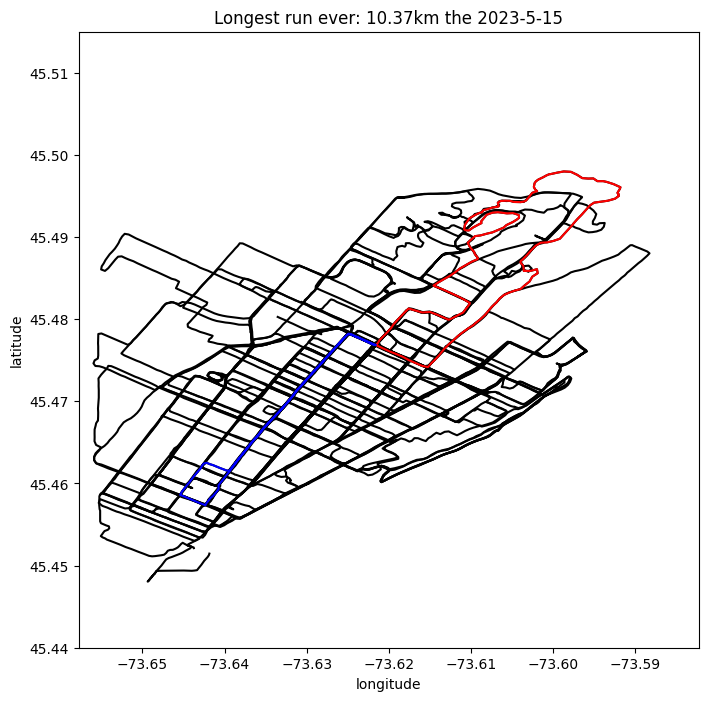

In [6]:
# longest run
index_longest_run = all_last_traces_info_df["cumulative_distance"].argmax()
one_long_run_df   = list_run_df[index_longest_run] 

index_run = index_longest_run
year   = all_last_traces_info_df.index[index_run].year
month  = all_last_traces_info_df.index[index_run].month 
day    = all_last_traces_info_df.index[index_run].day
length = all_last_traces_info_df["cumulative_distance"].iloc[index_longest_run] / 1000
date_in_text = "{0:1.0f}-{1:1.0f}-{2:1.0f}".format(year, month, day, length)

print("The longest did happen the Thursday {0:1.0f}-{1:1.0f}-{2:1.0f} and we ran {3:1.2f}km".format(year, month, day, length))
# plot all the traces
plt.rcParams['figure.figsize'] = [8, 8] 
fig, (ax1) = plt.subplots(1, 1,figsize=(8,8))

index_sel = np.arange(len(list_csv_files))
for c, i in enumerate(index_sel):
    single_gps_trace_df = list_run_df[index_sel[c]]
    plt.plot(single_gps_trace_df["longitude"],single_gps_trace_df["latitude"],c='k')
    
plt.plot(one_long_run_df["longitude"],one_long_run_df["latitude"],c='r',markersize=30)

one_long_run_df   = list_run_df[-1]
plt.plot(one_long_run_df["longitude"],one_long_run_df["latitude"],c='b',markersize=30)

plt.title("Longest run ever: {0:1.02f}km the ".format(length)+date_in_text+"")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis("equal");
#ax1.set_xlim(-73.79, -73.45)    
#ax1.set_ylim(45.45, 45.525)  
ax1.set_xlim(-73.79 , -73.45)    
ax1.set_ylim(45.45 - 0.01, 45.525 - 0.01) 
plt.savefig("../tmp/allRunTogtherDGRC.png".format(aa+1), bbox_inches='tight', dpi=300)


## Display by season

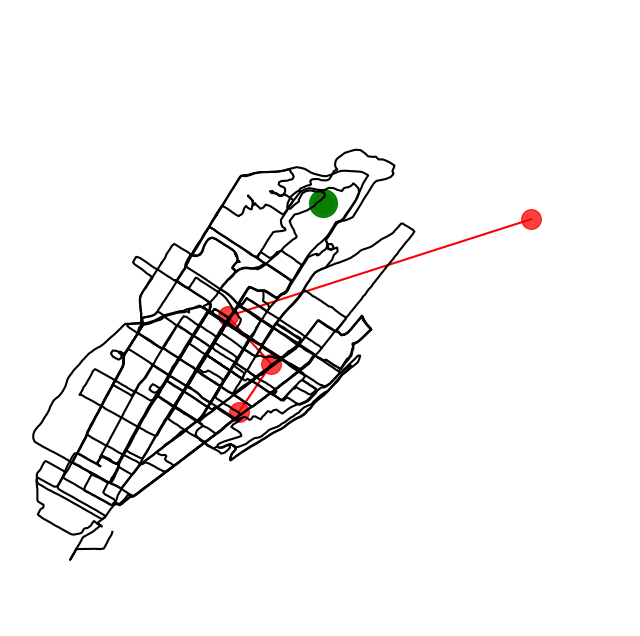

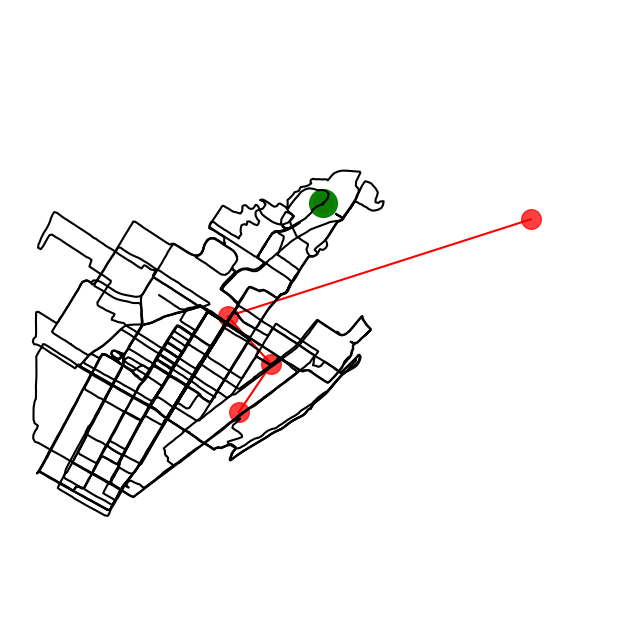

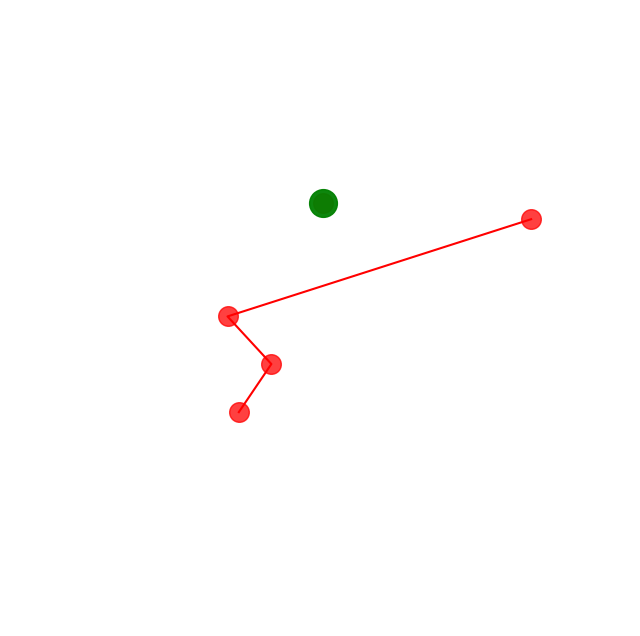

In [7]:
importlib.reload(ttrgpx)

list_starting_date =["2023-01-09","2024-01-09","2025-01-09"]

start_Lon = ttrgpx.startingPoint_df.iloc[:,3].to_numpy()
start_Lat = ttrgpx.startingPoint_df.iloc[:,2].to_numpy()

for aa in np.arange(len(list_starting_date)-1):
    select_run_df = all_last_traces_info_df[(all_last_traces_info_df.index >= list_starting_date[aa]) &
                                            (all_last_traces_info_df.index < list_starting_date[aa+1])].copy()
    index_sel = np.array(select_run_df["indexNum"].tolist())

    fig, (ax1) = plt.subplots(1, 1,figsize=(8,8))

    # plt reference points
    plt.scatter(start_Lon, start_Lat,c='r', alpha=0.75, s=200)
    plt.plot(start_Lon[0:4], start_Lat[0:4],'-',c='r')

    # draw line departure to summit circle
    plt.scatter(start_Lon[-1], start_Lat[-1], c='g', alpha=0.95, s=400)
    
    # plot the traces
    for c, i in enumerate(index_sel):
        single_gps_trace_df = list_run_df[index_sel[c]]
        ax1.plot(single_gps_trace_df["longitude"],single_gps_trace_df["latitude"],'k')

    # setup the graph limit
    #ax1.axis("equal");
    ax1.set_xlim(-73.66, -73.55) 
    ax1.set_ylim(45.45 - 0.01, 45.525 - 0.01) 
        
    ax1.set_axis_off()

    plt.savefig("../tmp/fig"+run_club_name+"Season{0:1.0f}.png".format(aa+1),bbox_inches='tight')


# empty graph
# empty graph
#importlib.reload(ttrgpx)
#ttrgpx.display_RefeferencePoint()
fig, (ax1) = plt.subplots(1, 1,figsize=(8,8))
# plt reference points
plt.scatter(start_Lon, start_Lat,c='r', alpha=0.75, s=200)
plt.plot(start_Lon[0:4], start_Lat[0:4],'-',c='r')

# draw line departure to summit circle
plt.scatter(start_Lon[-1], start_Lat[-1], c='g', alpha=0.95, s=400)

ax1.set_xlim(-73.66, -73.55) 
ax1.set_ylim(45.45 - 0.01, 45.525 - 0.01) 
ax1.set_axis_off()

plt.savefig("../tmp/figSeason666.png", bbox_inches='tight', dpi=300)



In [8]:
command_line_imagemagick_ = "montage -tile 3x1 \
../tmp/figNDGRCSeason1.png ../tmp/figNDGRCSeason2.png ../tmp/figSeason666.png \
-geometry 540x540+10+10 -background black ../tmp/imMontage34.jpg"
print(command_line_imagemagick_)

montage -tile 3x1 ../tmp/figNDGRCSeason1.png ../tmp/figNDGRCSeason2.png ../tmp/figSeason666.png -geometry 540x540+10+10 -background black ../tmp/imMontage34.jpg


In [9]:
subprocess.run(command_line_imagemagick_, shell=True)

CompletedProcess(args='montage -tile 3x1 ../tmp/figNDGRCSeason1.png ../tmp/figNDGRCSeason2.png ../tmp/figSeason666.png -geometry 540x540+10+10 -background black ../tmp/imMontage34.jpg', returncode=0)

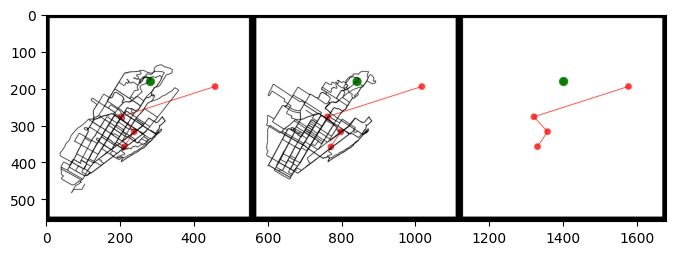

In [10]:
img_ = mpimg.imread('../tmp/imMontage34.jpg')
plt.imshow(img_)

In [11]:
# Create map
ndg = folium.Map(tiles = xyz.CartoDB.DarkMatter , # CartoDB.Positron ,  # "CartoDB positron", 
                       attr  = "My Attribution",  #
                       #width=1280,height=720,
                       location = (45.466348, -73.63596), # position for Notre Dame de Grace
                       zoom_start = 13)

# add run traced
maxElevation = 233 # Montreal highest point
locations = []
list_index_sel = np.arange(len(list_csv_files))
# apply color per trace
for tt in list_index_sel:
    one_run_trace  = [(x,y) for (x,y) in zip(list_run_df[tt]["latitude"].iloc[:].to_list(), 
                                             list_run_df[tt]["longitude"].iloc[:].to_list())]
    one_run_elevation = [z / maxElevation for z in list_run_df[tt]["elevation"].iloc[:].to_list()] 
    
    colors = np.ones(len(one_run_elevation))
    folium.ColorLine(positions = one_run_trace, 
                     colors    = one_run_elevation,
                     colormap  = ["pink","red"],
                     weight    = 2).add_to(ndg)
    locations.extend(one_run_trace)

# Display one gpd 
ndg.save("../tmp/map"+run_club_name+".html")
ndg

In [ ]:
# Add season dates

# Create images per season

# Create Folium map per season